### About this project
I collected Major League Baseball player and team statistics from Kaggle (LINK).  I reduced the data set to include only players who earned a MLB salary in 2015.  There were over 900 players who were on a MLB team in 2015, so I used a well-known Fantasy team ranking to isolate the top 300 players. (LINK)

There are two main types of baseball players - pitchers and hitters. Most pitchers will not generate similar hitting stats as their non-pitching teammates, so it is not reasonable to compare them on hitting stats.

Pitchers have unique stats that can be analyzed for pitchers only.


### Hypotheses/Questions
Given this set of data in regards to MLB and familiarity with Major League Baseball, I wanted to answer the following questions:

1. Are there more home runs (or hits) in the American League or the National League?
2. Do taller guys hit more home runs or hits? 
3. Do left-handed guys get more hits or home runs than right-handed?
4. Is there a difference (in terms of home runs) between non-pitchers above & below the avg salary?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import scipy as scipy
from scipy.stats import ttest_ind


%matplotlib inline
dfp  = pd.read_csv("C:/Users/boyerm/Documents/Thinkful/players.csv")
dft  = pd.read_csv("C:/Users/boyerm/Documents/Thinkful/teamsmb.csv")


In [2]:
print(dfp.columns)

Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'nameFirst', 'nameLast', 'nameGiven',
       'weight', 'height', 'bats', 'throws', 'debut', 'finalGame', 'retroID',
       'bbrefID', 'AvgSal', 'Yrs', '2015 Salary', 'Age in 2015', 'Num_Awards',
       'Num_AllStar', 'Fantasy_pos', 'HR', 'AB', 'Games', 'Hits',
       'Player_team', 'Player_League', 'Key_positions', 'Key_pos', 'RBI',
       'Stolen', 'CS', 'Walks', 'Strike_outs', 'Int_Walk', 'HBP', 'Sac_bunt',
       'Sac_fly', 'GIDP', 'Pitch_W', 'Pitch_L', 'Games.1', 'Game_starts',
       'Complete_game', 'Shutout', 'Save', 'IPouts', 'Hits_allowed',
       'Earned_run', 'HR.1', 'Walks.1', 'Stikeout', 'BAOpp', 'ERA',
       'Int_Walk.1', 'Wild_pitches', 'Hit_batter', 'Balk', 'Batters_faced',
       'Ground_fly', 'R', 'SH', 'SF', 'Double_plays'],
      dtype='object')


In [3]:
print(dft.columns)

Index(['TEAM', 'Average of salary', 'Average of # All Star Games',
       'Average of # Awards', 'Record 2015', 'Avg Attendance', 'League',
       'Home Runs', 'Runs', 'Earned Runs', 'Hits', '2B', '3B', 'BB', 'SO', 'E',
       'Capacity', 'Avg Att'],
      dtype='object')


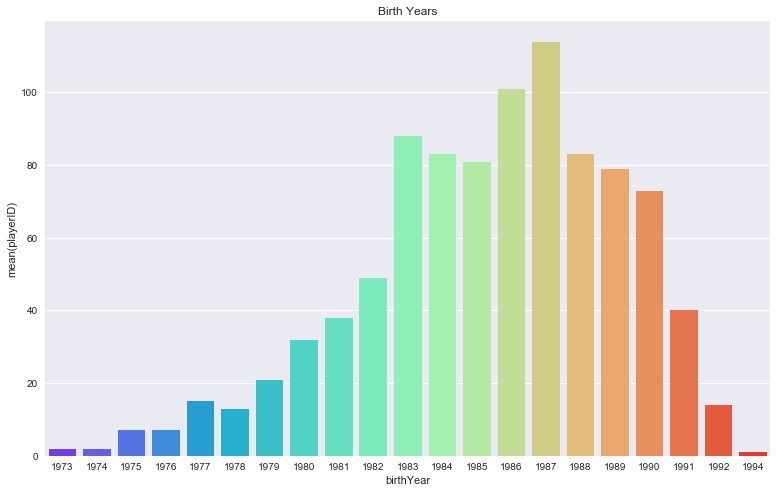

In [270]:
# Summary statistics:
# Looking at the ages of the players

s = dfp.groupby('birthYear').count()['playerID'].sort_values(ascending=False).head(21)
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(13,8)
g.set_title("Birth Years")
plt.show()

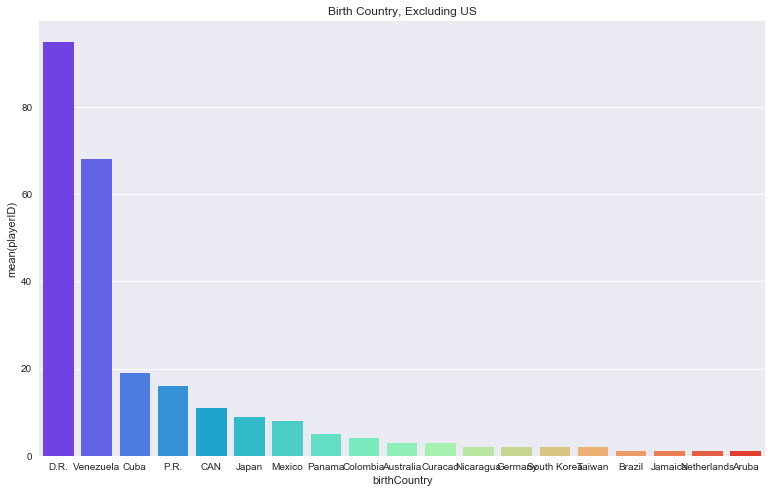

In [272]:
# Where are the players from?

s = dfp.groupby('birthCountry').count()['playerID'].sort_values(ascending=False).head(21)[1:]
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(13,8)
g.set_title("Birth Country, Excluding US")
plt.show()

In [6]:
# Salary stats:

print("The average salary for an MLB player in 2015 was $" + str(round(dfp['2015 Salary'].mean()/1000000,1)) + " Million.")
print("The lowest salary for an MLB player in 2015 was $" + str(round(dfp['2015 Salary'].min()/1000000,1)) + " Million.")
print("The highest salary for an MLB player in 2015 was $" + str(round(dfp['2015 Salary'].max()/1000000,1)) + " Million.")
print("The median salary for an MLB player in 2015 was $" + str(round(dfp['2015 Salary'].median()/1000000,1)) + " Million.")


The average salary for an MLB player in 2015 was $4.3 Million.
The lowest salary for an MLB player in 2015 was $0.5 Million.
The highest salary for an MLB player in 2015 was $32.6 Million.
The median salary for an MLB player in 2015 was $1.9 Million.


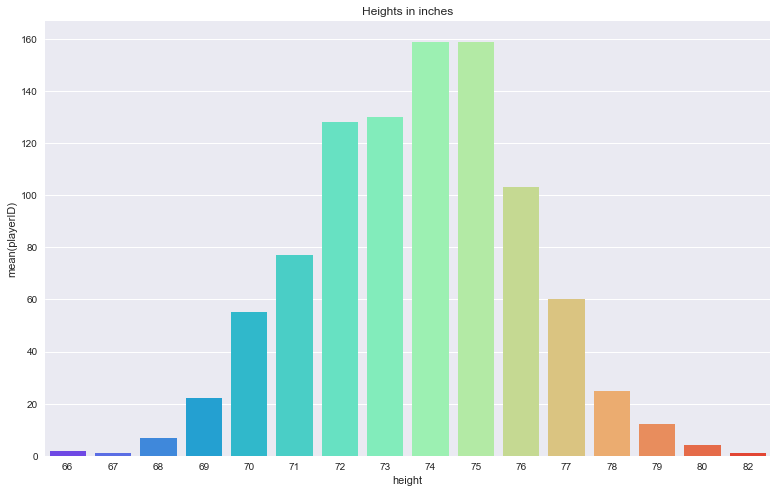

In [89]:
# Distribution of heights among players in 2015

s = dfp.groupby('height').count()['playerID'].sort_values(ascending=False)
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(13,8)
g.set_title("Heights in inches")
plt.show()

In [ ]:
# Most players are 6'2" or 6'3" tall

In [9]:
AL = dft[dft['League']=="AL"] #create dataframe of the AL
NL = dft[dft['League']=="NL"] #create dataframe of the NL


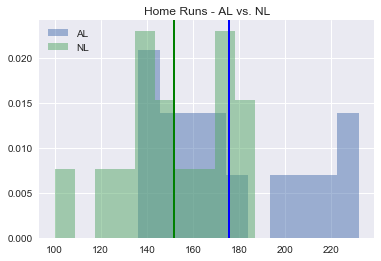

In [107]:
# Are there more home runs in the American League or the National League?
plt.hist(AL['Home Runs'], label = 'AL', alpha = 0.5, normed = True)
plt.axvline(AL['Home Runs'].mean(), color='b', linestyle='solid', linewidth=2)
plt.title('Home Runs - AL vs. NL')
plt.hist(NL['Home Runs'], label = 'NL', alpha = 0.5, normed = True)
plt.axvline(NL['Home Runs'].mean(), color='g', linestyle='solid', linewidth=2)
plt.legend(loc='upper left')
plt.show()

In [108]:
from scipy.stats import ttest_ind
print(ttest_ind(AL['Home Runs'], NL['Home Runs'], equal_var=False))

Ttest_indResult(statistic=2.1903335928542655, pvalue=0.037639453142486484)


In [109]:
# There's no difference between total home runs by NL teams and AL teams

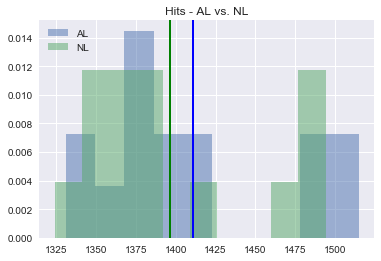

In [273]:
plt.hist(AL['Hits'], label = 'AL', alpha = 0.5, normed = True)
plt.axvline(AL['Hits'].mean(), color='b', linestyle='solid', linewidth=2)
plt.title('Hits - AL vs. NL')
plt.hist(NL['Hits'], label = 'NL', alpha = 0.5, normed = True)
plt.axvline(NL['Hits'].mean(), color='g', linestyle='solid', linewidth=2)
plt.legend(loc='upper left')
plt.show()

In [274]:
from scipy.stats import ttest_ind
print(ttest_ind(AL['Hits'], NL['Hits'], equal_var=False))

Ttest_indResult(statistic=0.67092063108694167, pvalue=0.50777040562607567)


In [275]:
# There's no difference between total hits by NL teams and AL teams

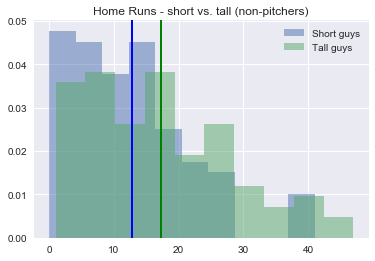

In [126]:
# Do taller guys hit more home runs? USe only top 300 players, defined by ESPN fantasy rank
hvar = 'HR'
Top = dfp[np.isfinite(dfp['Fantasy_pos'])]   # top 300
L = Top[Top['Key_pos']!= 'P' ]       #remove pitchers
L = L[L['height']<=L['height'].mean()]  # less than mean height of top 300, non-pitchers

H = Top[Top['Key_pos']!= 'P']
H = H[H['height']>H['height'].mean()]


plt.hist(L[hvar], label = 'Short guys', alpha = 0.5, normed = True)
plt.axvline(L[hvar].mean(), color='b', linestyle='solid', linewidth=2)
plt.title('Home Runs - short vs. tall (non-pitchers)')
plt.hist(H[hvar], label = 'Tall guys', alpha = 0.5, normed = True)
plt.axvline(H[hvar].mean(), color='g', linestyle='solid', linewidth=2)
plt.legend(loc='upper right')
plt.show()

In [127]:
from scipy.stats import ttest_ind
print(ttest_ind(L[hvar], H[hvar], equal_var=False))

Ttest_indResult(statistic=-3.0334504601490249, pvalue=0.0027858454016005969)


In [116]:
# For the top 300 players (as defined by ESPN Fantasy rankings in 2015), taller players do get more home runs (P<= 0.05)

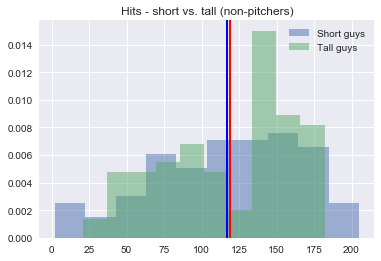

In [128]:
# Do taller guys get more hits? (use top 300 players as defined by Fantasy Rank)
hvar = 'Hits'

plt.hist(L[hvar], label = 'Short guys', alpha = 0.5, normed = True)
plt.axvline(L[hvar].mean(), color='b', linestyle='solid', linewidth=2)
plt.title('Hits - short vs. tall (non-pitchers)')
plt.hist(H[hvar], label = 'Tall guys', alpha = 0.5, normed = True)
plt.axvline(H[hvar].mean(), color='r', linestyle='solid', linewidth=2)
plt.legend(loc='upper right')
plt.show()

In [129]:
from scipy.stats import ttest_ind
print(ttest_ind(L[hvar], H[hvar], equal_var=False))

Ttest_indResult(statistic=-0.31214423988146683, pvalue=0.7552812904316446)


In [130]:
# For the top 300 players (as defined by ESPN Fantasy rankings in 2015), taller players do NOT get more hits (P> 0.05)

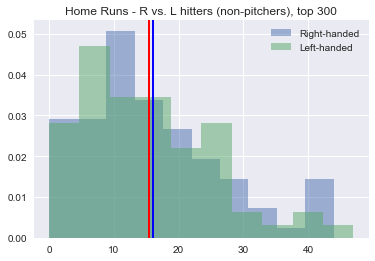

In [131]:
# Right-handed hitters vs. Left-handed?
# For HR
hvar = 'HR'

R = Top[Top['bats']=='R'] #top only
R = R[R['Key_pos']!= 'P' ]       #remove pitchers

LE = Top[Top['bats']=='L']
LE = LE[LE['Key_pos']!= 'P']


plt.hist(R[hvar], label = 'Right-handed', alpha = 0.5, normed = True)
plt.axvline(R[hvar].mean(), color='b', linestyle='solid', linewidth=2)
plt.title('Home Runs - R vs. L hitters (non-pitchers), top 300')
plt.hist(LE[hvar], label = 'Left-handed', alpha = 0.5, normed = True)
plt.axvline(LE[hvar].mean(), color='r', linestyle='solid', linewidth=2)
plt.legend(loc='upper right')
plt.show()

In [132]:
from scipy.stats import ttest_ind
print(ttest_ind(R[hvar], LE[hvar], equal_var=False))

Ttest_indResult(statistic=0.3842392182701122, pvalue=0.70136232398342035)


In [95]:
# No difference in RH vs LH players for Home Runs (top 300)

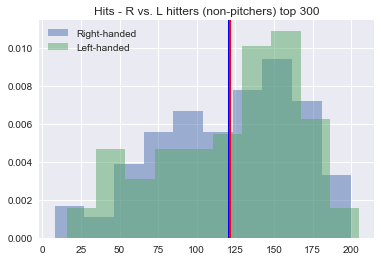

In [133]:
# For Hits
hvar = 'Hits'

plt.hist(R[hvar], label = 'Right-handed', alpha = 0.5, normed = True)
plt.axvline(R[hvar].mean(), color='b', linestyle='solid', linewidth=2)
plt.title('Hits - R vs. L hitters (non-pitchers) top 300')
plt.hist(LE[hvar], label = 'Left-handed', alpha = 0.5, normed = True)
plt.axvline(LE[hvar].mean(), color='r', linestyle='solid', linewidth=2)
plt.legend(loc='upper left')
plt.show()

In [125]:
from scipy.stats import ttest_ind
print(ttest_ind(R[hvar], LE[hvar], equal_var=False))

Ttest_indResult(statistic=-0.090607279767719678, pvalue=0.92793388203694693)


In [ ]:
# no difference in  LH and RH players (top 300) for hits

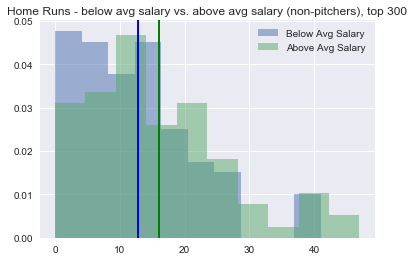

In [138]:
# Home runs - above or below salary
hvar = 'HR'

LS = Top[Top['Key_pos']!= 'P' ]       #removes pitchers
LS = LS[LS['2015 Salary']<=LS['2015 Salary'].mean()] # Less than avg sal of top 300


H = Top[Top['Key_pos']!= 'P']
H = H[H['2015 Salary']>H['2015 Salary'].mean()] 


plt.hist(L[hvar], label = 'Below Avg Salary', alpha = 0.5, normed = True)
plt.axvline(L[hvar].mean(), color='b', linestyle='solid', linewidth=2)
plt.title('Home Runs - below avg salary vs. above avg salary (non-pitchers), top 300')
plt.hist(H[hvar], label = 'Above Avg Salary', alpha = 0.5, normed = True)
plt.axvline(H[hvar].mean(), color='g', linestyle='solid', linewidth=2)
plt.legend(loc='upper right')
plt.show()


In [139]:
from scipy.stats import ttest_ind
print(ttest_ind(LS[hvar], H[hvar], equal_var=False))

Ttest_indResult(statistic=-1.3036082086562841, pvalue=0.19415711967714794)


Hmmmm, no difference between those above & below the avg salary of the non-pitchers, top 300 players! What do they pay them for :)

C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


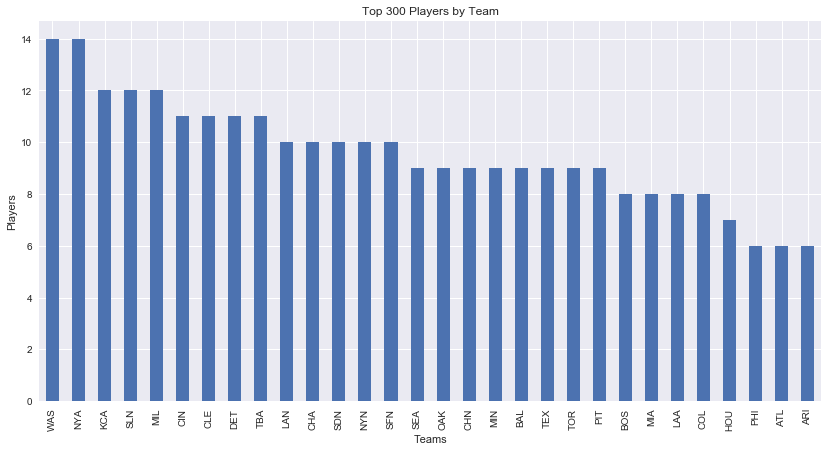

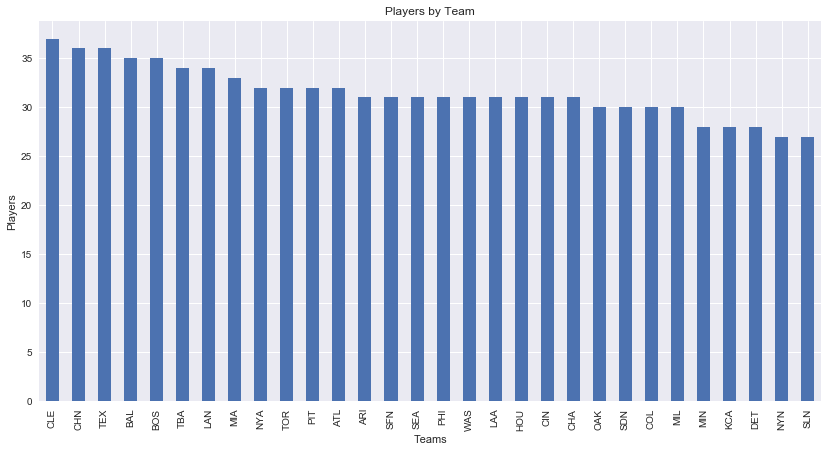

In [264]:
# Players by team - top & all

teams = Top[['Player_team','playerID']] # top 300 players by team
team = teams.groupby(['Player_team']).count()
ateams = dfp[['Player_team','playerID']] # top 300 players by team
ateam = ateams.groupby(['Player_team']).count()

my_plot = team.sort(columns = 'playerID',ascending=False).plot(kind='bar',legend = None, title = "Top 300 Players by Team")
my_plot.figure.set_size_inches(14,7)

my_plot.set_xlabel("Teams")
my_plot.set_ylabel("Players")

my_plot = ateam.sort(columns = 'playerID',ascending=False).plot(kind='bar',legend = None, title = "Players by Team")
my_plot.figure.set_size_inches(14,7)

my_plot.set_xlabel("Teams")
my_plot.set_ylabel("Players")

plt.show()

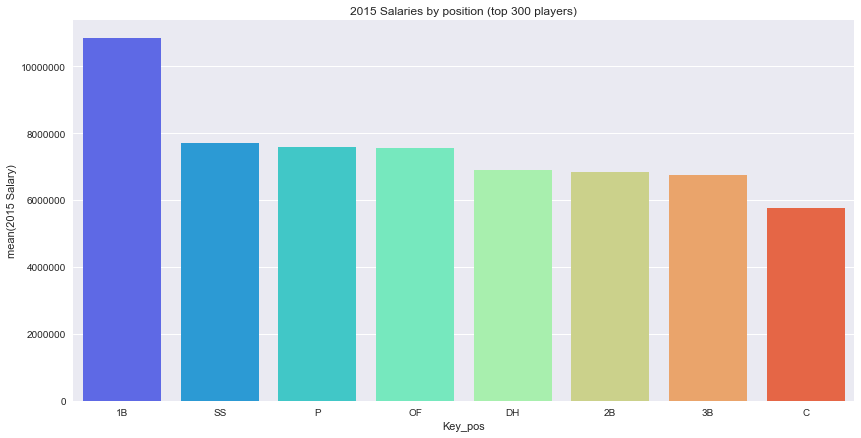

In [265]:
# Let's look at the avg salary by position

s = dfp.groupby('Key_pos').mean()['2015 Salary'].sort_values(ascending=False)
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(14,7)
g.set_title("2015 Salaries by position (top 300 players)")
plt.ticklabel_format(style='plain', axis='y')

In [276]:
# Hmmm, pays to be a first baseman. I guess they are busy.

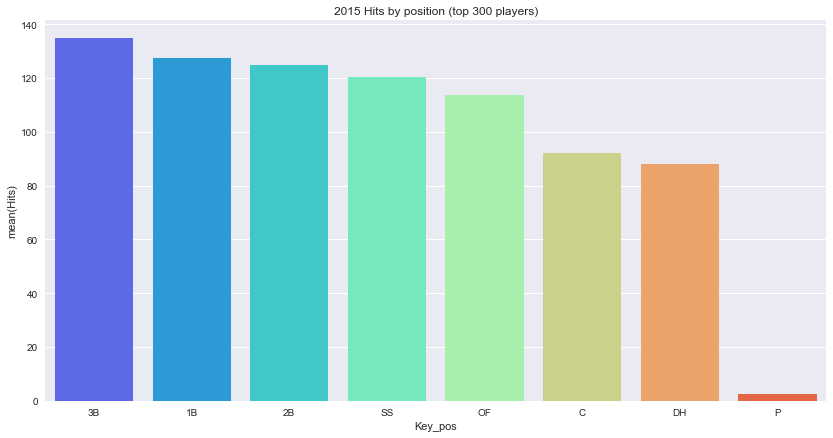

In [143]:
#Which position gets the most hits?
s = dfp.groupby('Key_pos').mean()['Hits'].sort_values(ascending=False)
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(14,7)
g.set_title("2015 Hits by position (top 300 players)")
plt.ticklabel_format(style='plain', axis='y')

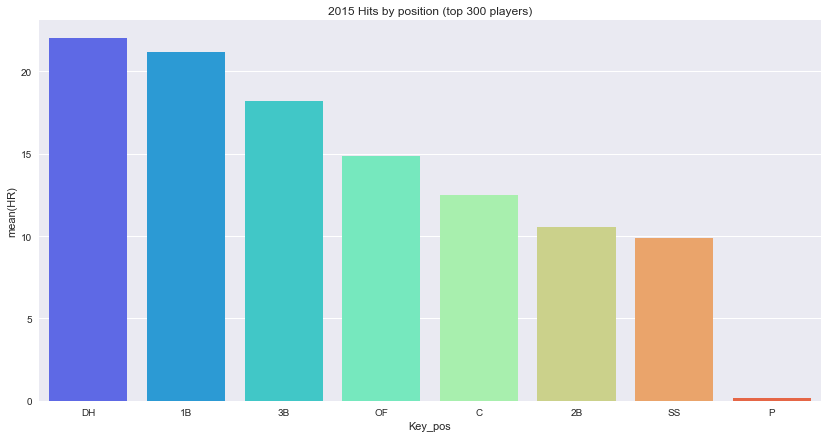

In [145]:
# Which positions get the most hits? No surprise that the DH is a good hitter (not a good HR hitter, 
#but if that were the case, they would probably be in the game more!)

s = dfp.groupby('Key_pos').mean()['HR'].sort_values(ascending=False)
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(14,7)
g.set_title("2015 Hits by position (top 300 players)")
plt.ticklabel_format(style='plain', axis='y')

In [ ]:
#hold on to this
#delete
Top = dfp[np.isfinite(dfp['Fantasy_pos'])]   # top 300
s = Top.groupby('Age in 2015').mean()['2015 Salary'].sort_values(ascending=False)
g = sns.barplot(s.index, s,color="red", fill=False)
g.figure.set_size_inches(14,7)
g.set_title("2015 Salary by Age")
plt.ticklabel_format(style='plain', axis='y')

AllP = dfp.groupby('Age in 2015').mean()['2015 Salary'].sort_values(ascending=False)
g = sns.barplot(AllP.index, AllP,color="blue", fill = False)
g.figure.set_size_inches(14,7)
plt.ticklabel_format(style='plain', axis='y')



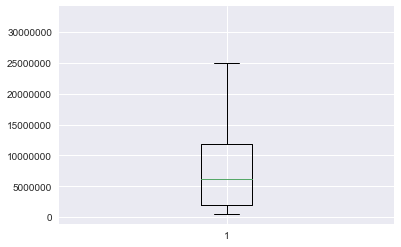

In [79]:
#NOT using
#delete
Top = dfp[np.isfinite(dfp['Fantasy_pos'])]   # top 300

plt.boxplot( Top['2015 Salary'])
plt.ticklabel_format(style='plain', axis='y')

plt.boxplot( Top['2015 Salary'])
plt.ticklabel_format(style='plain', axis='y')

plt.show()

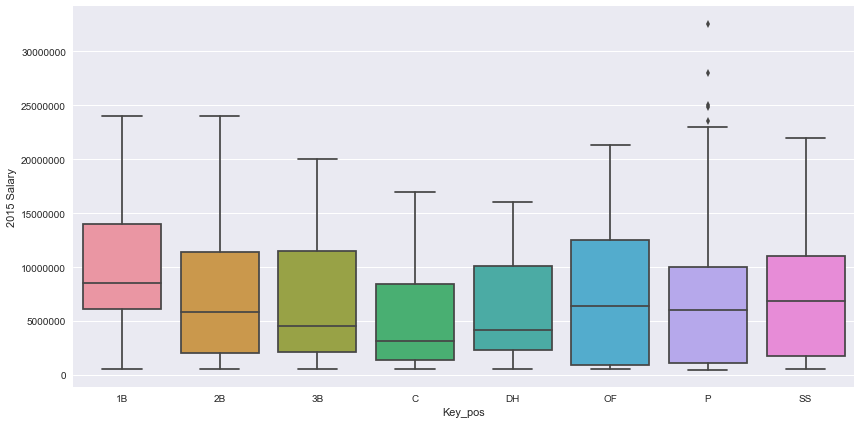

In [148]:
# Salary by Position (top 300)
ax = sns.boxplot(x='Key_pos', y='2015 Salary', data=Top)
plt.ticklabel_format(style='plain', axis='y')
ax.figure.set_size_inches(14,7)

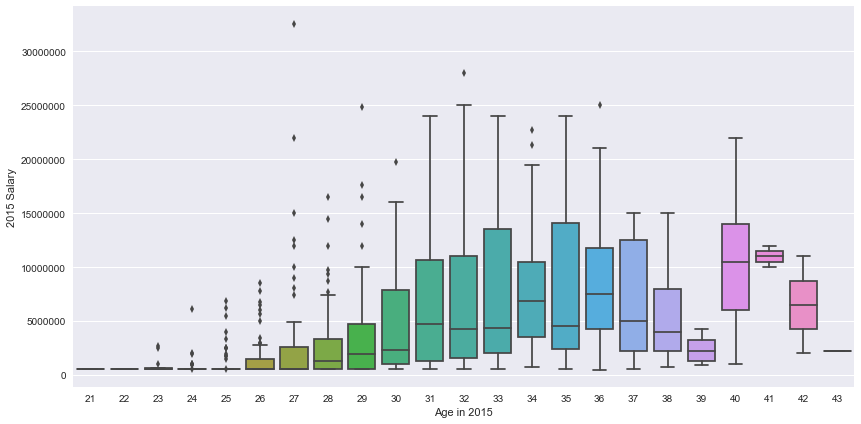

In [85]:
# Salary by Age (all)
ax = sns.boxplot(x='Age in 2015', y='2015 Salary', data=dfp)
plt.ticklabel_format(style='plain', axis='y')
ax.figure.set_size_inches(14,7)

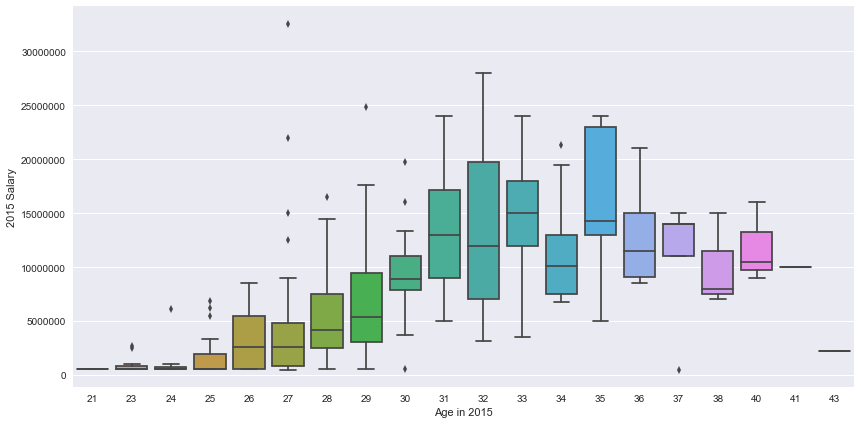

In [149]:
# Salary by Age (top 300)
ax = sns.boxplot(x='Age in 2015', y='2015 Salary', data=Top)
plt.ticklabel_format(style='plain', axis='y')
ax.figure.set_size_inches(14,7)

In [156]:
# Just checking
print(round(dfp['2015 Salary'].std(),0))
print(round(Top['2015 Salary'].mean(),0))
print(round(dfp['2015 Salary'].mean(),0))


5504811.0
7636897.0
4289493.0


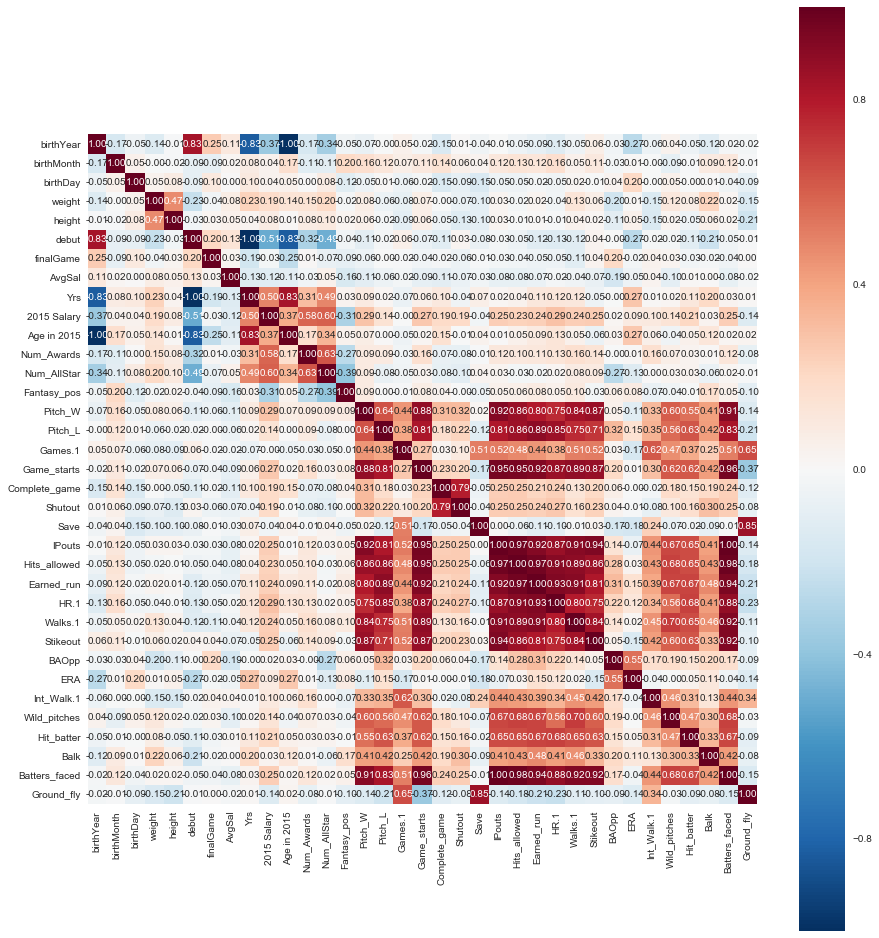

In [157]:
dfpp = Top[Top['Key_pos']=='P']    # create table of pitchers (top 300)
dfpp = dfpp[['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'nameFirst', 'nameLast', 'nameGiven',
       'weight', 'height', 'bats', 'throws', 'debut', 'finalGame', 'retroID',
       'bbrefID', 'AvgSal', 'Yrs', '2015 Salary', 'Age in 2015', 'Num_Awards',
       'Num_AllStar', 'Fantasy_pos','Player_team', 'Player_League', 'Key_positions', 'Key_pos', 'Pitch_W', 'Pitch_L', 'Games.1', 'Game_starts',
       'Complete_game', 'Shutout', 'Save', 'IPouts', 'Hits_allowed',
       'Earned_run', 'HR.1', 'Walks.1', 'Stikeout', 'BAOpp', 'ERA',
       'Int_Walk.1', 'Wild_pitches', 'Hit_batter', 'Balk', 'Batters_faced',
       'Ground_fly']]
corrmat = dfpp.corr() 
f, ax = plt.subplots(figsize=(15, 17))
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True,annot=True,fmt='.2f')
plt.show()

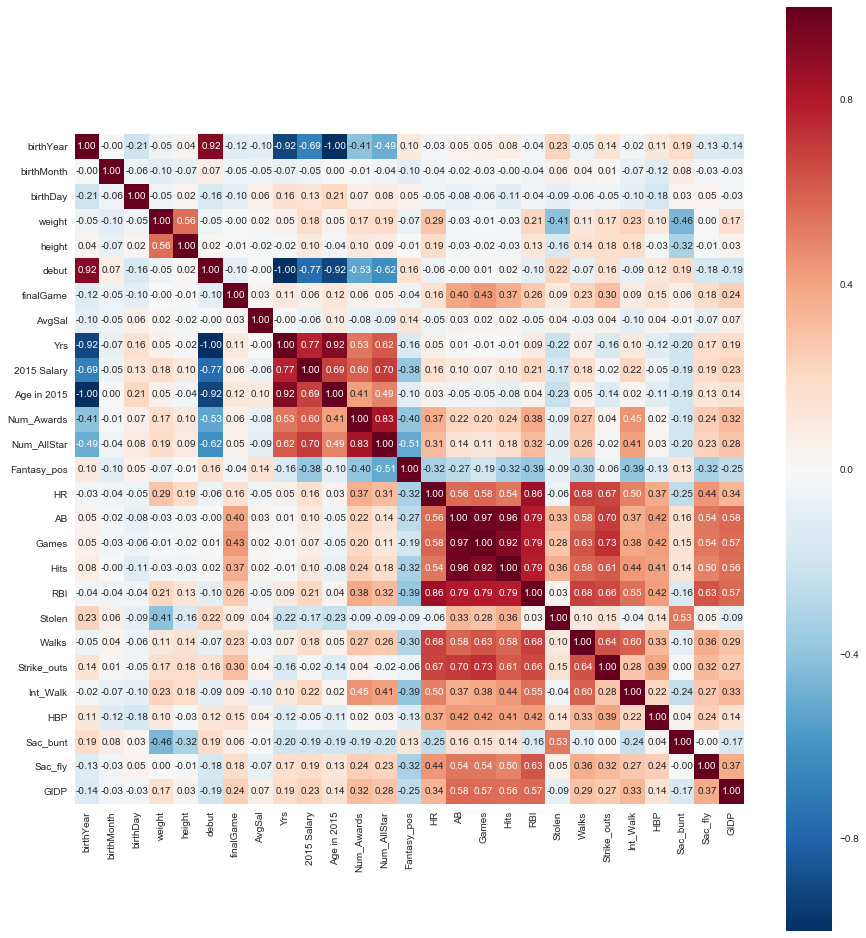

In [158]:
dfph = Top[Top['Key_pos']!='P']   # top 300 non-pitchers
dfph = dfph[['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'nameFirst', 'nameLast', 'nameGiven',
       'weight', 'height', 'bats', 'throws', 'debut', 'finalGame', 'retroID',
       'bbrefID', 'AvgSal', 'Yrs', '2015 Salary', 'Age in 2015', 'Num_Awards',
       'Num_AllStar', 'Fantasy_pos', 'HR', 'AB', 'Games', 'Hits',
       'Player_team', 'Player_League', 'Key_positions', 'Key_pos', 'RBI',
       'Stolen',  'Walks', 'Strike_outs', 'Int_Walk', 'HBP', 'Sac_bunt',
       'Sac_fly', 'GIDP']]


corrmat = dfph.corr() 
f, ax = plt.subplots(figsize=(15, 17))
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True,annot=True,fmt='.2f')
plt.show()

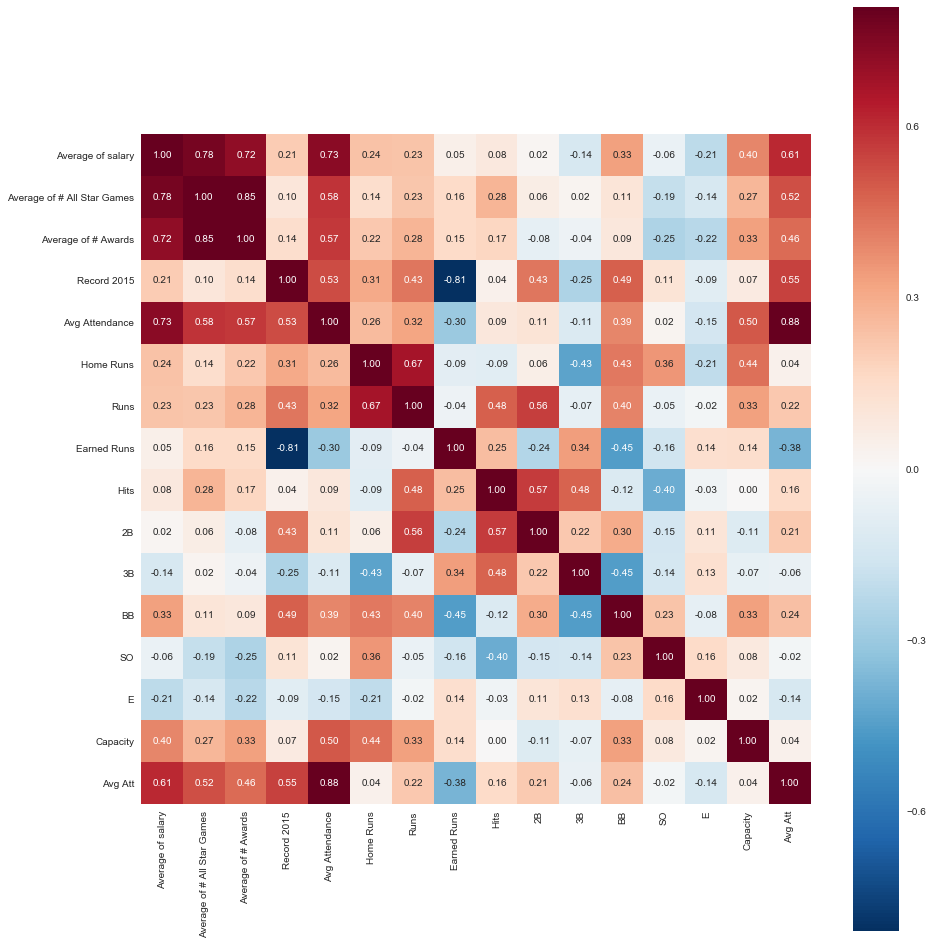

In [31]:
corrmat = dft.corr() 
f, ax = plt.subplots(figsize=(15, 17))
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True,annot=True,fmt='.2f')
plt.show()